### Datapoints

| $x$ | -3 | -2  | -1  | 0 | 1   | 2   |
|-----|----|-----|-----|---|-----|-----|
| $y$ | 1.6 | -1.4 | 7 | 2.2 | -4.4 | 22.6 |

### Difference Table

| $x$ | $y$  | $\Delta y$ |  $\Delta^2 y$ | $\Delta ^3 y$ | $\Delta ^4 y$ | $\Delta ^5 y$ |
|-----|------|------------|---------------|---------------|---------------|---------------|
| -3  | 1.6  | -3         | 11.4          | -24.6         | 36            | -12           |
| -2  | -1.4 | 8.4        | -13.2         | 11.4          | 24            |               |
| -1  | 7    | -4.8       | -1.8          | 35.4          |               |               |
| 0   | 2.2  | -6.6       | 33.6          |               |               |               |
| 1   | -4.4 | 27         |               |               |               |               |
| 2   | 22.6 |            |               |               |               |               |


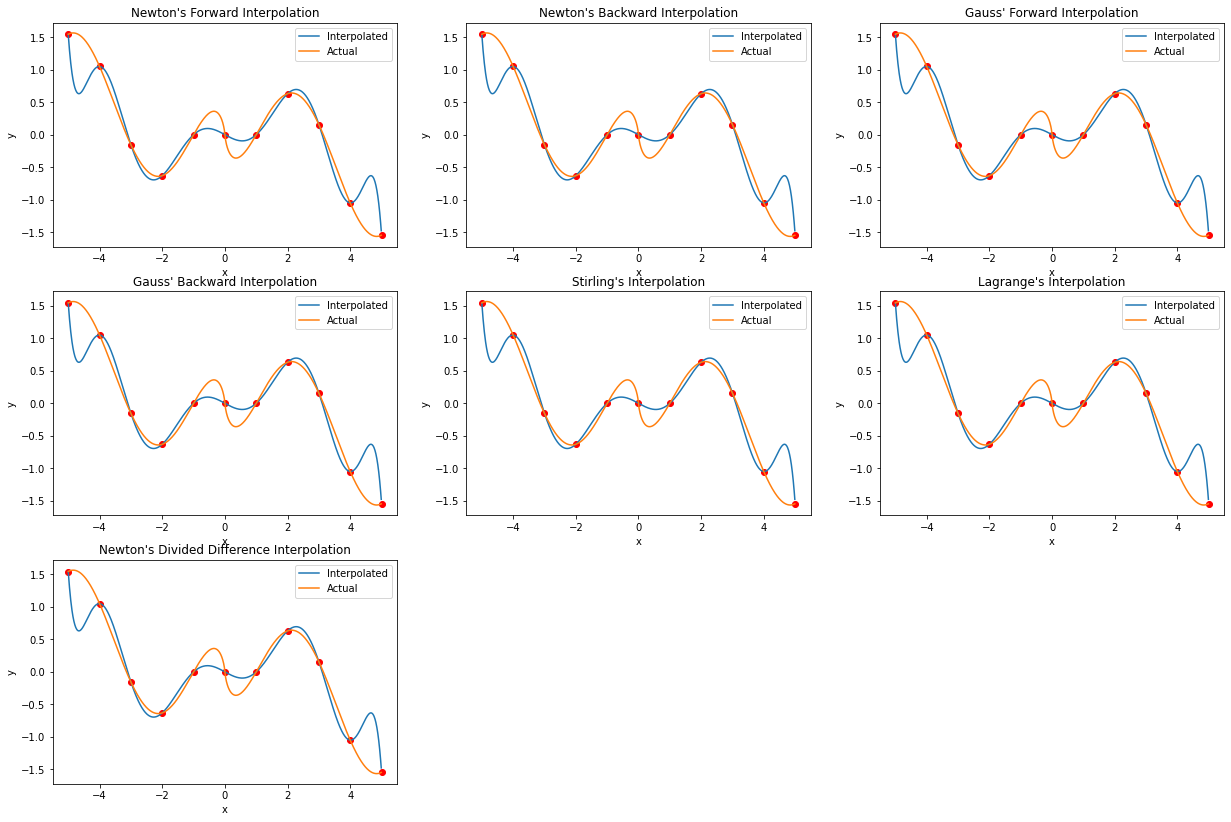

In [3]:
#title Interpolation
import matplotlib.pyplot as plt
import math

def fact(n):
  if n>=0:
    j = 1
    for i in range(1, n+1):
      j*=i
    return j
  else:
    raise ValueError("Factorial not defined for negative numbers")


def minNumGreatThan(lst,x):
  return min([j for j in lst if j>x])


def maxNumLessThan(lst, x):
  return max([j for j in lst if j<x])


class Interpolation():

  def __init__(self, X, Y, name = "Interpolation"):
    self.Xlst = X
    self.Ylst = Y
    self.diffLst = Interpolation.getDiffLst(self.Ylst)
    self.name = name
  
  @staticmethod
  def getSingleDiffLst(lst):
    return [lst[i+1]-lst[i] for i in range(len(lst)-1)]

  @staticmethod
  def getDiffLst(lst):
    difflst = []
    for i in range(len(lst)-1):
      temp = Interpolation.getSingleDiffLst(lst)
      difflst.append(temp)
      lst = temp
    return difflst

  @staticmethod
  def getAvgInterval(lst):
    difflst = Interpolation.getSingleDiffLst(lst)
    return sum(difflst)/len(difflst)

  def plot(self, f=None):
    x1 = [i/100 for i in range(int(100*self.Xlst[0]), int(100*self.Xlst[-1]), 1)]
    y1 = [self.getY(x) for x in x1]
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(self.name)
    plt.plot(x,y,"ro")
    plt.plot(x1,y1, label="Interpolated")
    if f is not None:
      y0 = [f(x) for x in x1]
      plt.plot(x1,y0, label="Actual")
    plt.legend()


class NewtonForward(Interpolation):

  def __init__(self, Xlst, Ylst, name = "Newton's Forward Interpolation"):
    Interpolation.__init__(self, Xlst, Ylst, name)
  
  def getY(self,x):
    # if x in self.Xlst:
    #   return self.Ylst[self.Xlst.index(x)]
    x0 = self.Xlst[0] #maxNumLessThan(self.Xlst, x)
    h = (x-x0)/self.getAvgInterval(self.Xlst)
    y = self.Ylst[0]
    diff = [self.diffLst[i][0] for i in range(0,len(self.diffLst))]
    h0 = 1
    for i in range(len(diff)):
      h0 *= (h-i)
      y += h0*diff[i]/fact(i+1)
    
    return y


class NewtonBackward(Interpolation):

  def __init__(self, Xlst, Ylst, name = "Newton's Backward Interpolation"):
    Interpolation.__init__(self, Xlst, Ylst, name)

  def getY(self,x):
    # if x in self.Xlst:
    #   return self.Ylst[self.Xlst.index(x)]
    x0 = self.Xlst[-1] #minNumGreatThan(self.Xlst,x)
    h = (x-x0)/self.getAvgInterval(self.Xlst)
    y = self.Ylst[-1]
    diff = [self.diffLst[i][-1] for i in range(0,len(self.diffLst))]
    h0 = 1
    for i in range(len(diff)):
      h0 *= (h+i)
      y += h0*diff[i]/fact(i+1)
    
    return y


class GaussForward(Interpolation):

  def __init__(self, Xlst, Ylst, name = "Gauss' Forward Interpolation"):
    Interpolation.__init__(self, Xlst, Ylst, name)

  def getY(self,x):
    # if x in self.Xlst:
    #   return self.Ylst[self.Xlst.index(x)]
    x0 = self.Xlst[(len(self.Xlst)-1)//2] #maxNumLessThan(self.Xlst,x)
    h = (x-x0)/self.getAvgInterval(self.Xlst)
    y = self.Ylst[(len(self.Xlst)-1)//2]
    diff = []
    try:
      m = (len(self.Xlst)-1)//2
      diff.append(self.diffLst[0][m])
      for k in range(1,len(self.diffLst),2):
        m -= 1
        if m<0: 
          break
        diff.append(self.diffLst[k][m])
        diff.append(self.diffLst[k+1][m])
    except IndexError:
      pass
    
    h0 = 1
    d = 0
    for i in range(len(diff)):
      h0 *= (h+((-1)**i)*d)
      d += 1 if (-1)**i == 1 else 0
      y += h0*diff[i]/fact(i+1)
    
    return y


class GaussBackward(Interpolation):

  def __init__(self, Xlst, Ylst, name = "Gauss' Backward Interpolation"):
    Interpolation.__init__(self, Xlst, Ylst, name)

  def getY(self,x):
    # if x in self.Xlst:
    #   return self.Ylst[self.Xlst.index(x)]
    x0 = self.Xlst[len(self.Xlst)//2] #minNumGreatThan(self.Xlst,x)
    h = (x-x0)/self.getAvgInterval(self.Xlst)
    y = self.Ylst[len(self.Xlst)//2]
    diff = []
    try:
      m = len(self.Xlst)//2
      for k in range(0,len(self.diffLst),2):
        m -= 1
        if m<0: 
          break
        diff.append(self.diffLst[k][m])
        diff.append(self.diffLst[k+1][m])
    except IndexError:
      pass
    
    h0 = 1
    d = 0
    for i in range(len(diff)):
      h0 *= (h-((-1)**i)*d)
      d += 1 if (-1)**i == 1 else 0
      y += h0*diff[i]/fact(i+1)
    
    return y


class Stirling(GaussForward, GaussBackward):

  def __init__(self, Xlst,Ylst, name = "Stirling's Interpolation"):
    GaussForward.__init__(self, Xlst, Ylst, name)
    GaussBackward.__init__(self, Xlst, Ylst, name)
  
  def getY(self, x):
    return (GaussForward.getY(self, x)+ GaussBackward.getY(self, x))/2


class Lagrange(Interpolation):

  def __init__(self, Xlst, Ylst, name = "Lagrange's Interpolation"):
    Interpolation.__init__(self, Xlst, Ylst, name)
  
  def getY(self,x):
    # if x in self.Xlst:
    #   return self.Ylst[self.Xlst.index(x)]
    y = 0
    for i in range(len(self.Xlst)):
      numerator, denomerator = 1,1
      for j in range(0,len(self.Xlst)):
        if i == j:
          continue
        numerator *= x-self.Xlst[j] 
        denomerator *= self.Xlst[i]-self.Xlst[j]
      y += numerator*self.Ylst[i]/denomerator
    
    return y


class NewtonDivDiff(Interpolation):

  def __init__(self, Xlst, Ylst, name = "Newton's Divided Difference Interpolation"):
    Interpolation.__init__(self, Xlst, Ylst, name )
    self.divDiffLst = self.getDivDiffLst(self.Ylst, self.Xlst)
  
  @staticmethod
  def getDivDiffLst(Ylst, Xlst):
    divDiffLst = []
    for i in range(len(Ylst)-1):
      temp = []
      for j in range(len(Ylst)-1):
        temp.append((Ylst[j+1]-Ylst[j])/(Xlst[i+j+1]-Xlst[j]))
      divDiffLst.append(temp)
      Ylst = temp
    return divDiffLst

  def getY(self,x):
    # if x in self.Xlst:
    #   return self.Ylst[self.Xlst.index(x)]
    x0 = self.Xlst[0] #maxNumLessThan(self.Xlst, x)
    h0 = 1
    y = self.Ylst[0]
    diff = [self.divDiffLst[i][0] for i in range(0,len(self.divDiffLst))]
    for i in range(len(diff)):
      h0 *= (x - self.Xlst[i])
      y += h0*diff[i]
    return y


class Interpolator():

  def __init__(self, Xlst, Ylst):
    self.NF = NewtonForward(Xlst, Ylst)
    self.NB = NewtonBackward(Xlst, Ylst)
    self.GF = GaussForward(Xlst, Ylst)
    self.GB = GaussBackward(Xlst, Ylst)
    self.ST = Stirling(Xlst, Ylst)
    self.LG = Lagrange(Xlst, Ylst)
    self.NDD = NewtonDivDiff(Xlst, Ylst)
    self.iter = {"nf":self.NF, "nb":self.NB, "gf":self.GF, "gb":self.GB, "st":self.ST, "lg":self.LG, "ndd":self.NDD}

  def getY(self, x, *args):
    if args == ():
      for key in self.iter:
        print(self.iter[key].name," :",self.iter[key].getY(x))
    else:
      for key in self.iter:
        if key in args:
          print(self.iter[key].name," :",self.iter[key].getY(x))

  def plot(self, f=None, *args):
    args = self.iter.keys() if args == () else [x for x in self.iter.keys() if x in args]
    plt.figure(figsize=(21,14))
    for i, j in enumerate(args):
      plt.subplot(3,3,i+1)
      self.iter[j].plot(f)
    plt.show()


## equal intervals
# x = [x for x in range(-3,3,1)]
# y = [1.6, -1.4, 7, 2.2, -4.4, 22.6]
# f = lambda x: -0.1*x**5 + x**4 + 4.4*x**3 + -1.9*x**2 + -10*x + 2.2

x = [x for x in range(-5,6)]
y = [1.543,1.049,-0.155,-0.63,0,0,0,0.63,0.155,-1.049,-1.543]
f = lambda x: math.sin(x)*math.log(abs(x)) if x != 0 else 0

# x = [x for x in range(-5,6) if x!=0]
# y = [2.716,2.673,2.437,1.895,1,1,1.895,2.437,2.673,2.716]
# f = lambda x: math.e**math.sin(math.log(abs(x))) if x!=0 else 2

## unequal intervals
# x = [-3.2, -3, -1.6, -0.5, 0.9, 1.6, 1.8]
# y = [4.57, -2.8, -1.484, 1.841, -8.934, 0.463, 7.913]
# f = lambda x: -0.1*x**5 + x**4 + 4.4*x**3 + -1.9*x**2 + -10*x - 2.2

## textbook example
# x = [4,5,7,10,11,13]
# y = [48,100,294,900,1210,2028]

# x = [-3.5, -2.5, -0.7, 1, 2.8, 3.5]
# y = [8, 4, 0.5, 0.7, 5, 8]

obj = Interpolator(x,y)
obj.plot(f)